In [101]:
import pandas as pd

df = pd.read_csv(r'C:\Users\SREEVIBU\OneDrive\Desktop\breast_cancer\data.csv')
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [102]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [103]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se         

In [104]:
df.skew(numeric_only=True)

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [105]:
from sklearn.preprocessing import PowerTransformer

skewed_cols = ['radius_mean','texture_mean','perimeter_mean','compactness_mean', 'concavity_mean', 'radius_se', 'compactness_se','symmetry_se','concavity_worst',
               'concavity_se', 'fractal_dimension_se', 'concave points_se','area_mean','concave points_mean','fractal_dimension_mean','smoothness_se','compactness_worst',
               'symmetry_worst', 'fractal_dimension_worst', 'radius_worst', 'perimeter_worst', 'area_worst','symmetry_mean','texture_se','perimeter_se','area_se']

pt = PowerTransformer(method='yeo-johnson')
df[skewed_cols] = pt.fit_transform(df[skewed_cols])

In [106]:
df.skew(numeric_only=True)

radius_mean                0.008176
texture_mean               0.000172
perimeter_mean             0.007262
area_mean                  0.005204
smoothness_mean            0.456324
compactness_mean           0.105564
concavity_mean             0.223924
concave points_mean        0.198740
symmetry_mean             -0.016675
fractal_dimension_mean     0.036216
radius_se                  0.194796
texture_se                 0.013032
perimeter_se               0.080793
area_se                    0.069306
smoothness_se              0.084004
compactness_se             0.204970
concavity_se               0.145901
concave points_se         -0.037805
symmetry_se                0.135894
fractal_dimension_se       0.234550
radius_worst               0.033651
texture_worst              0.498321
perimeter_worst            0.031123
area_worst                 0.026797
smoothness_worst           0.415426
compactness_worst          0.091660
concavity_worst            0.085410
concave points_worst       0

In [107]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])


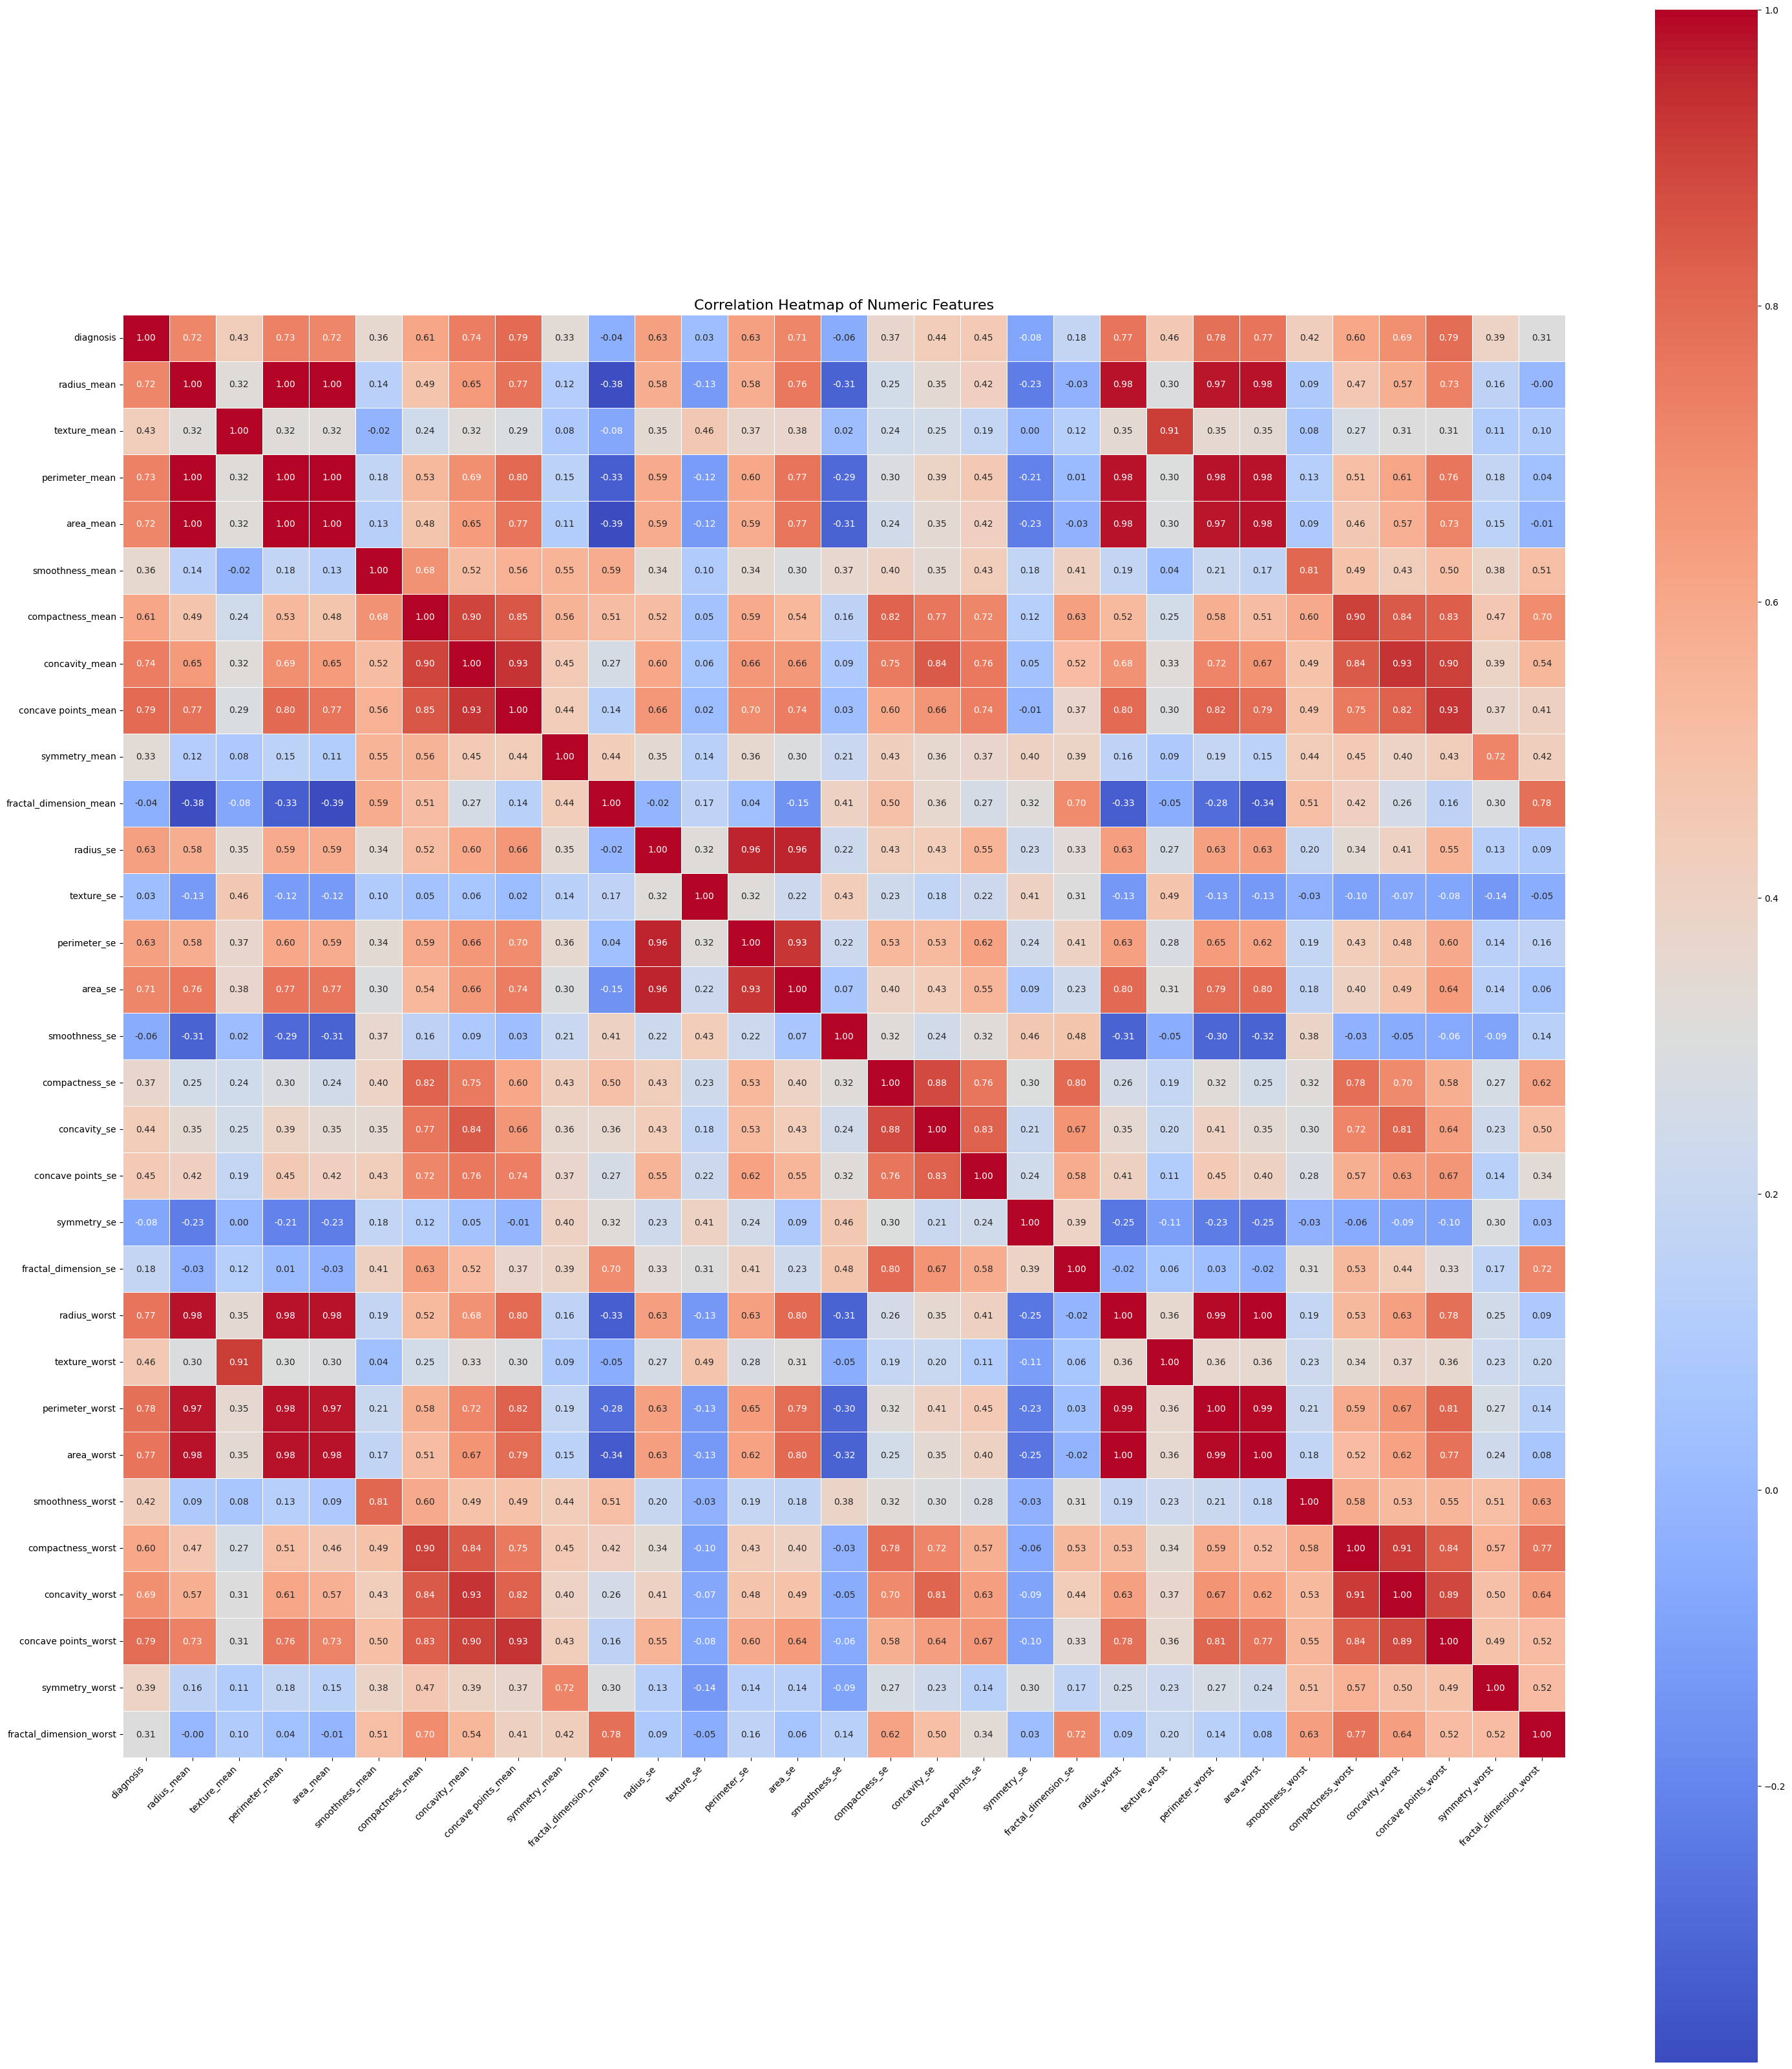

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(30,40))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(['diagnosis','fractal_dimension_mean','texture_se','smoothness_se','fractal_dimension_se','symmetry_se'], axis=1)
y = df['diagnosis']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 25)
Shape of X_test: (114, 25)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [110]:
from sklearn.svm import SVC

rbf_svc = SVC(kernel='rbf', random_state=42)

rbf_svc.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

grid_search_rbf = GridSearchCV(rbf_svc, param_grid, cv=5)
grid_search_rbf.fit(X_train, y_train)

print("Best parameters for RBF kernel:", grid_search_rbf.best_params_)
print("Best estimator for RBF kernel:", grid_search_rbf.best_estimator_)

Best parameters for RBF kernel: {'C': 100, 'gamma': 0.01}
Best estimator for RBF kernel: SVC(C=100, gamma=0.01, random_state=42)


In [112]:

linear_svc = SVC(kernel='linear', random_state=42)

linear_svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}

grid_search_linear = GridSearchCV(linear_svc, param_grid, cv=5)
grid_search_linear.fit(X_train, y_train)

print("Best parameters for Linear kernel:", grid_search_linear.best_params_)
print("Best estimator for Linear kernel:", grid_search_linear.best_estimator_)

Best parameters for Linear kernel: {'C': 0.1}
Best estimator for Linear kernel: SVC(C=0.1, kernel='linear', random_state=42)


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


best_rbf_model = grid_search_rbf.best_estimator_
y_pred_rbf = best_rbf_model.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)
roc_auc_rbf = roc_auc_score(y_test, best_rbf_model.decision_function(X_test))

print("RBF Kernel Model Metrics:")
print(f"Accuracy: {accuracy_rbf:.4f}")
print(f"Precision: {precision_rbf:.4f}")
print(f"Recall: {recall_rbf:.4f}")
print(f"F1 Score: {f1_rbf:.4f}")
print(f"ROC-AUC: {roc_auc_rbf:.4f}")


best_linear_model = grid_search_linear.best_estimator_
y_pred_linear = best_linear_model.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)
roc_auc_linear = roc_auc_score(y_test, best_linear_model.decision_function(X_test))

print("\nLinear Kernel Model Metrics:")
print(f"Accuracy: {accuracy_linear:.4f}")
print(f"Precision: {precision_linear:.4f}")
print(f"Recall: {recall_linear:.4f}")
print(f"F1 Score: {f1_linear:.4f}")
print(f"ROC-AUC: {roc_auc_linear:.4f}")
print(y_pred_linear)

RBF Kernel Model Metrics:
Accuracy: 0.9649
Precision: 0.9535
Recall: 0.9535
F1 Score: 0.9535
ROC-AUC: 0.9974

Linear Kernel Model Metrics:
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
ROC-AUC: 0.9957
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]


In [115]:
print("Comparison of Linear and RBF Kernel SVM Models:")
print("-" * 40)

print(f"Metric      | Linear Kernel | RBF Kernel")
print("-" * 40)
print(f"Accuracy    | {accuracy_linear:.4f}        | {accuracy_rbf:.4f}")
print(f"Precision   | {precision_linear:.4f}        | {precision_rbf:.4f}")
print(f"Recall      | {recall_linear:.4f}        | {recall_rbf:.4f}")
print(f"F1 Score    | {f1_linear:.4f}        | {f1_rbf:.4f}")
print(f"ROC-AUC     | {roc_auc_linear:.4f}        | {roc_auc_rbf:.4f}")
print("-" * 40)



Comparison of Linear and RBF Kernel SVM Models:
----------------------------------------
Metric      | Linear Kernel | RBF Kernel
----------------------------------------
Accuracy    | 0.9649        | 0.9649
Precision   | 0.9756        | 0.9535
Recall      | 0.9302        | 0.9535
F1 Score    | 0.9524        | 0.9535
ROC-AUC     | 0.9957        | 0.9974
----------------------------------------


In [116]:
import pickle

with open("breast_cancer.pkl", "wb") as f:
    pickle.dump(linear_svc,f)